In [1]:
# Part 1: Association Rule Mining
# Given the eye tracking data where the fixations of users are recorded, based on a given stimula that is a webpage, we are 
# required to find the most frequent itemsets. The most frequent itemsets correspond to the set of fixations that occur
# most frequently together. E.g. set of the fixation (A,L,M) could be a frequent fixation. 

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import json
import pandas as pd
from sklearn.cluster import DBSCAN
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_file = "CNG514-Assignment-3-data/Babylon_sequence_dataset.txt"

# users_fixations is a list of list, where each list belongs to a user and stores their fixations.
# the time information for each fixation has been removed since it won't be used for part 1.
users_fixations = []
with open(data_file, 'r') as file:
    # Process each user
    for user in file:
        user_fixation = []
        user_fixations = eval(user)
        # process each fixation for a user
        for fixation in user_fixations:
            # only take the id of the fixation and leave behind time info
            user_fixation.append(fixation[0])
        users_fixations.append(user_fixation)

print((users_fixations)[0])
        


['R', 'N', 'M', 'H', 'H', 'B', 'M', 'I', 'I', 'M', 'M', 'M', 'M', 'H', 'H', 'C', 'K', 'M', 'I', 'R', 'R', 'M', 'I', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'I', 'H', 'M', 'M', 'M', 'M', 'M', 'K', 'M', 'Q', 'R', 'M', 'R', 'M', 'M', 'P', 'Q', 'R', 'M', 'L', 'R', 'R', 'Q', 'P', 'P', 'P', 'Q', 'R', 'R', 'S', 'S', 'N', 'Q', 'P', 'N', 'P', 'P', 'Q', 'P', 'P', 'P', 'Q', 'P', 'P', 'P', 'P', 'P', 'N', 'N', 'P', 'P', 'P', 'Q', 'Q', 'Q', 'R', 'R', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']


In [5]:
# Initialize TransactionEncoder
te = TransactionEncoder()

# te.fit_transform analyzes the input transaction data to determine the unique items present in the entire dataset.
# Fit and transform the itemsets to a one-hot encoded NumPy array
itemsets_encoded = te.fit_transform(users_fixations)

# Convert the encoded itemsets array to a DataFrame
df = pd.DataFrame(itemsets_encoded, columns=te.columns_)

In [6]:
# Apply the apriori algorithm to find frequent itemsets.
# The Apriori algorithm is used for association rule mining and determines frequent itemsets based on a minimum support 
# threshold. Confidence, on the other hand, is used to assess the strength of association rules derived from the frequent 
# itemsets.
frequent_itemsets = apriori(df, min_support=0.75, use_colnames=True)

# Sort the itemsets by support in descending order
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# we got 1407 frequent itemsets based on min_support of 0.75
print(frequent_itemsets)

      support                        itemsets
219      1.00                       (R, Q, S)
204      1.00                       (M, P, Q)
54       1.00                          (M, S)
53       1.00                          (M, R)
52       1.00                          (M, Q)
...       ...                             ...
1121     0.75              (R, J, M, K, S, N)
1120     0.75              (J, M, Q, K, S, N)
1119     0.75              (R, J, M, Q, K, N)
1118     0.75              (J, M, P, K, S, N)
1406     0.75  (R, I, L, M, H, P, Q, K, S, N)

[1407 rows x 2 columns]


In [7]:
# analyzing the results
# first lets look into the itemsets with support of 1; those that appear in every user's set of fixations.
# we can play with the value of the support_threshold as we like.
support_threshold = 1
frequent_itemsets_support_1 = frequent_itemsets[frequent_itemsets['support'] == support_threshold]
print(frequent_itemsets_support_1)
print("There are ", str(len(frequent_itemsets_support_1)), "set of fixations whose support is 1")
print("Meaning that they appear in every user's set of fixation!")

     support         itemsets
219      1.0        (R, Q, S)
204      1.0        (M, P, Q)
54       1.0           (M, S)
53       1.0           (M, R)
52       1.0           (M, Q)
51       1.0           (M, P)
61       1.0           (P, S)
62       1.0           (R, Q)
63       1.0           (Q, S)
64       1.0           (R, S)
506      1.0     (R, P, Q, S)
501      1.0     (M, R, Q, S)
500      1.0     (M, R, P, S)
59       1.0           (P, Q)
498      1.0     (M, R, P, Q)
499      1.0     (M, P, Q, S)
205      1.0        (M, R, P)
208      1.0        (M, Q, S)
218      1.0        (R, P, S)
217      1.0        (P, Q, S)
862      1.0  (R, M, Q, S, P)
5        1.0              (M)
216      1.0        (R, P, Q)
7        1.0              (P)
8        1.0              (Q)
9        1.0              (R)
10       1.0              (S)
209      1.0        (M, R, S)
60       1.0           (R, P)
207      1.0        (M, R, Q)
206      1.0        (M, P, S)
There are  31 set of fixations whose sup

In [8]:
# below, we can further filter the frequent itemsets based on the length of the itemsets (the number of
# fixations it has). To sum up, the first filter we applied was based on the support_threshold and the second
# filter was based on the number of fixation in the itemset.
# we can play with the value of n_itemset as we wish.
n_itemset = 1
frequent_1_itemsets_support_1 = frequent_itemsets_support_1[frequent_itemsets_support_1['itemsets'].apply(lambda x: len(x) == n_itemset)]
print(frequent_1_itemsets_support_1)
# as it can be seen only M,P,Q,R,S itemsets have support of 1 and have only one fixation (1-itemset)

    support itemsets
5       1.0      (M)
7       1.0      (P)
8       1.0      (Q)
9       1.0      (R)
10      1.0      (S)


In [9]:
# Finding the maximum_frequent_itemset from the frequent itemsets of support 1
maximum_frequent_itemset = frequent_itemsets_support_1.loc[frequent_itemsets_support_1['itemsets'].apply(len).idxmax(), 'itemsets']
print(maximum_frequent_itemset)

frozenset({'R', 'M', 'Q', 'S', 'P'})


In [10]:
# Finding the maximum_frequent_itemset from the frequent itemsets (those which survived Apriori with min_sup) 
maximum_frequent_itemset = frequent_itemsets.loc[frequent_itemsets['itemsets'].apply(len).idxmax(), 'itemsets']
print(maximum_frequent_itemset)

frozenset({'R', 'I', 'L', 'M', 'H', 'P', 'Q', 'K', 'S', 'N'})


In [11]:
# testing what happens when min_support is reduced to 0.5. we expect an increase in the number
# of frequent itemsets because it becomes easier to be considered as frequent when the minimum 
# support is 0.5 compared to 0.75
frequent_itemsets_min_sup_05 = apriori(df, min_support=0.50, use_colnames=True)

# Sort the itemsets by support in descending order
frequent_itemsets_min_sup_05 = frequent_itemsets_min_sup_05.sort_values(by='support', ascending=False)

# we got 1407 frequent itemsets based on min_support of 0.75. and we got 4159 for min sup of 0.5
print(frequent_itemsets_min_sup_05)

      support                           itemsets
882       1.0                       (M, R, Q, S)
83        1.0                             (Q, S)
877       1.0                       (M, P, Q, S)
879       1.0                       (M, R, P, S)
69        1.0                             (M, Q)
...       ...                                ...
1791      0.5                 (I, M, Q, P, C, N)
1790      0.5                 (R, I, Q, C, K, S)
1789      0.5                 (R, I, C, K, S, P)
1788      0.5                 (I, Q, C, K, S, P)
4158      0.5  (R, L, I, J, M, Q, P, K, S, N, V)

[4159 rows x 2 columns]


In [12]:
# Part 2: Clustering

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm 
# commonly used in machine learning and data mining. It is designed to discover clusters of data points based 
# on their density distribution in the feature space.

# It has 2 hyper-parameters: Eps (Maximum radius of the neighbourhood) and 
# Minpts (Minimum number of points in an Eps-neighbourhood of that point)

In [13]:
# Data preparation

folder_path = './CNG514-Assignment-3-data/Babylon_fixation_dataset'

# List all files in the folder
files = os.listdir(folder_path)

users = []

# Iterate over each file
for file_name in files:
    # Construct the absolute file path
    file_path = os.path.join(folder_path, file_name)

    # read the file
    with open(file_path, 'r') as file:
        
        # each line represents a single fixation
        fixations = file.readlines()
        
        # the user list holds all the fixations belonging to a user
        user = []
        # skip the first line that holds attribute names
        for fixation in fixations[1:]:
            # Split the fixation information by the tab ('\t') delimiter
            # since the webpage is same for everyone, we can discard that attribute.
            fixation = fixation.strip().split('\t')[:-1]
            user.append(fixation)
    
    # for some users the fixation data is lost, hence, we should skip such users.
    # this can be considered as a step of data preparation.
    if user != []:
        users.append(user)


In [14]:
# note: we are given 38 files that hold user fixation data. however, some have been
# observed to be empty, specifically 2. Hence, there are 36 users with available data
print("There are", str(len(users)), "users.")
print("Not all users have the same number of fixations!")
print(users[0][0])

There are 36 users.
Not all users have the same number of fixations!
['1', '183659', '638', '794', '766']


In [15]:
# We agreed to ignore the stimula name since all the users were looking at the same webpage.
# Now, lets do further feature engineering. 
# First, lets experiment with reducing features and only taking location 
# (x and y coordinates) info into account so that at least we can see it on a 2d plot because 
# if the number of features is more than 2, then its not possible to see the clusters in a 2d plot.
fixations_combined = []
for user in users:
    for fixation in user:
        # only get the coordinate (x,y) values
        filtered_features = [int (fixation[3]), int (fixation[4])]
        fixations_combined.append(filtered_features)
    
print(fixations_combined[0])


[794, 766]


In [16]:
# Create a DBSCAN instance
dbscan = DBSCAN(eps=20, min_samples=10)

# Perform DBSCAN clustering
labels = dbscan.fit_predict(fixations_combined)


In [17]:
# Getting only the unique cluster labels
unique_labels = np.unique(labels)

# Printing the unique cluster labels by discarding the outlier label with (-1)
print("The unique clusers are", unique_labels[1:])

# getting the outliers. they are the one with label of -1
outliers = [value for value in labels if value != -1]
print("\nThe number of fixations that are considered as outliers based on hyperparamters of min_samples=10 and eps=20 is", len(outliers))

print("There are in total", len(labels), "fixation points.")
percentage_of_ouliers = round((len(outliers)/len(labels))*100, 1)
print(str(percentage_of_ouliers),"% of them have been labeled as outlies")

The unique clusers are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

The number of fixations that are considered as outliers based on hyperparamters of min_samples=10 and eps=20 is 2604
There are in total 3622 fixation points.
71.9 % of them have been labeled as outlies


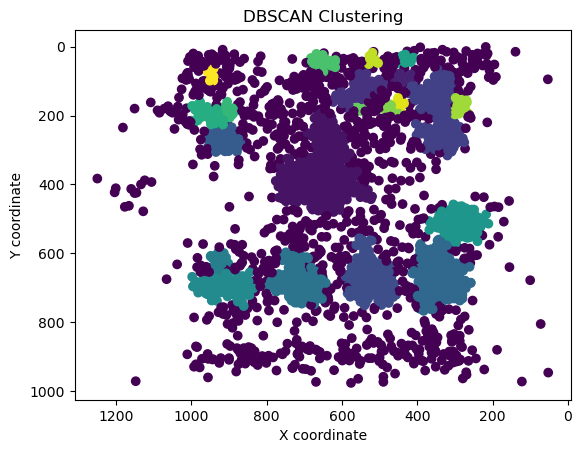

In [18]:
# Plot the results
plt.scatter([fixations[0] for fixations in fixations_combined], [fixations[1] for fixations in fixations_combined], c=labels, cmap='viridis')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('DBSCAN Clustering')
# Invert the y-axis
plt.gca().invert_yaxis()
# Invert the x-axis
plt.gca().invert_xaxis()
plt.show()


In [19]:
def grid_search_dbscan(fixations_combined, min_samples_values, eps_values, target_clusters=22):
    # Initialize variables to store the best parameters and metrics
    best_min_samples = None
    best_eps = None
    labels_found = None
    
    # these variables are aimed to be minimized.
    # we want to find as many clusters as it is asked for. note that sometimes we do not know the number of 
    # clusers. in that case the code can be modified to take that into account. 
    best_num_clusters_diff = float('inf')

    # Iterate over each combination of min_samples and eps
    for min_samples in min_samples_values:
        for eps in eps_values:
            # Create a DBSCAN instance with the current parameters
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)

            # Perform DBSCAN clustering
            labels = dbscan.fit_predict(fixations_combined)
            unique_labels, counts = np.unique(labels, return_counts=True)

            # Exclude outliers (label -1) from counts
            counts = counts[unique_labels != -1]

            # Get the number of clusters and outliers
            num_clusters = len(counts)
            num_outliers = counts[0] if len(counts) > 0 else 0

            # Calculate the difference between the actual and target number of clusters
            num_clusters_diff = abs(num_clusters - target_clusters)

            # Check if the current parameters result in the smallest num_clusters_diff
            if num_clusters_diff < best_num_clusters_diff:
                best_min_samples = min_samples
                best_eps = eps
                best_num_clusters_diff = num_clusters_diff
                labels_found = labels

    # Return the best parameters found
    return best_min_samples, best_eps, labels_found


In [20]:
def plot_dbscan_results(fixations_combined, labels):
    # Plot the results
    plt.scatter([fixations[0] for fixations in fixations_combined],
                [fixations[1] for fixations in fixations_combined],
                c=labels,
                cmap='viridis')
    
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.title('DBSCAN Clustering')
    
    # Invert the y-axis
    plt.gca().invert_yaxis()
    
    # Invert the x-axis
    plt.gca().invert_xaxis()
    
    plt.show()

Best min_samples: 10
Best eps: 20


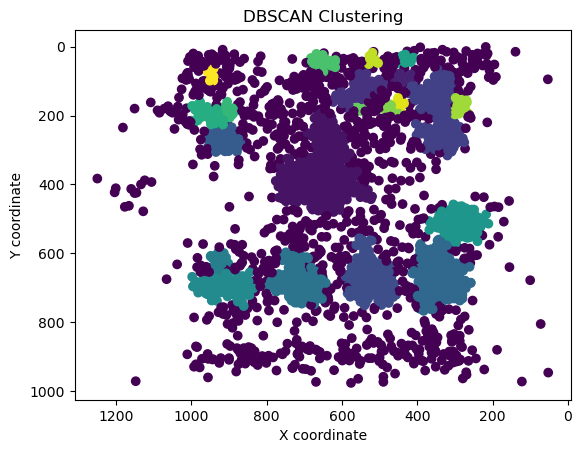

In [34]:

min_samples_values = [5, 10, 15, 20, 25]
eps_values = [10, 20, 30, 40]

best_min_samples, best_eps, labels = grid_search_dbscan(fixations_combined, min_samples_values, eps_values, target_clusters=22)

print("Best min_samples:", best_min_samples)
print("Best eps:", best_eps)

# Plot the results
plot_dbscan_results(fixations_combined, labels)

Best min_samples: 20
Best eps: 10


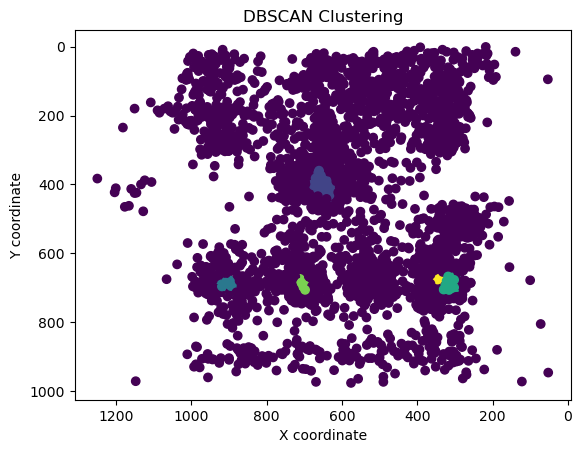

In [35]:
best_min_samples, best_eps, labels = grid_search_dbscan(fixations_combined, min_samples_values, eps_values, target_clusters=5)

print("Best min_samples:", best_min_samples)
print("Best eps:", best_eps)

# Plot the results
plot_dbscan_results(fixations_combined, labels)